In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import *
# from neurodynex3.phase_plane_analysis import fitzhugh_nagumo


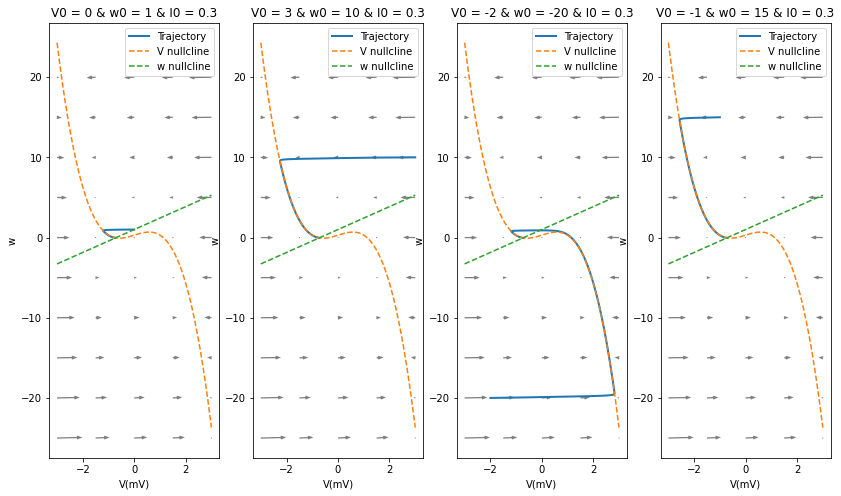

In [26]:
#QUESTION1 PART 2. Please run this section before all the next sections
def FN(y,t,I0,a,b,c,d):        

    V, w = y
    
    dydt = [-V**3 + (a+1)* V**2 - a*V - w + I0 , -c*w + b*V + d]

    return dydt

def V_nullcline(V_arr,I0,a):
    w = -V_arr**3 + (a+1)* V_arr**2 - a*V_arr + I0 
    return w

def w_nullcline(V_arr,b,c,d):
    w = 1/c * (b*V_arr + d)
    return w

I0 = 0.3
T0 = 100 #Total simulation time [ms]
dt = 0.01; #time resolution [ms]
T  = math.ceil(T0/dt)  # Total time steps [ms]
t = np.arange(0,T)*dt #time vector
a = -1
a_param = 0.08 #a parameter in w differential equation (for part 6)
b = a_param
c = a_param*0.7
d = 0.056


fig, ax = plt.subplots(figsize =(14, 8))
x = np.linspace(-3, 3, 5) #V-axis
y = np.arange(-25, 25, 5) #w-axis
X, Y = np.meshgrid(x, y)

u1 = -X**3 + (a+1)* X**2 - a*X - Y + I0 #horizontal direction for plot arrows
u2 = -c*Y + b*X + d #vertical direction for plot arrows


V0_arr = np.array([0, 3, -2, -1])
w0_arr = np.array([1, 10, -20, 15])
V_arr = np.linspace(-3,3,1000)

V_null = V_nullcline(V_arr,I0,a)
w_null = w_nullcline(V_arr,b,c,d)

for i in range(len(V0_arr)):
    V0 = V0_arr[i]
    w0 = w0_arr[i]
    y0 = np.array([V0,w0])

   

    y = odeint(FN, y0, t, args=(I0,a,b,c,d))
    V = y[:,0]
    w = y[:,1]

    plt.subplot(1,len(V0_arr),i+1)
    plt.plot(V,w,linewidth=2)
    plt.plot(V_arr,V_null, linestyle = 'dashed')
    plt.plot(V_arr,w_null, linestyle = 'dashed')


    plt.title("V0 = "+str(V0)+" & w0 = "+str(w0)+" & I0 = "+str(I0))
    plt.xlabel('V(mV)')              # Label the axes
    plt.ylabel('w')
    plt.legend(['Trajectory','V nullcline','w nullcline'])




    plt.quiver(X, Y, u1, u2,scale_units='xy', scale=50,headlength = 4, alpha = 0.5)


plt.show()    

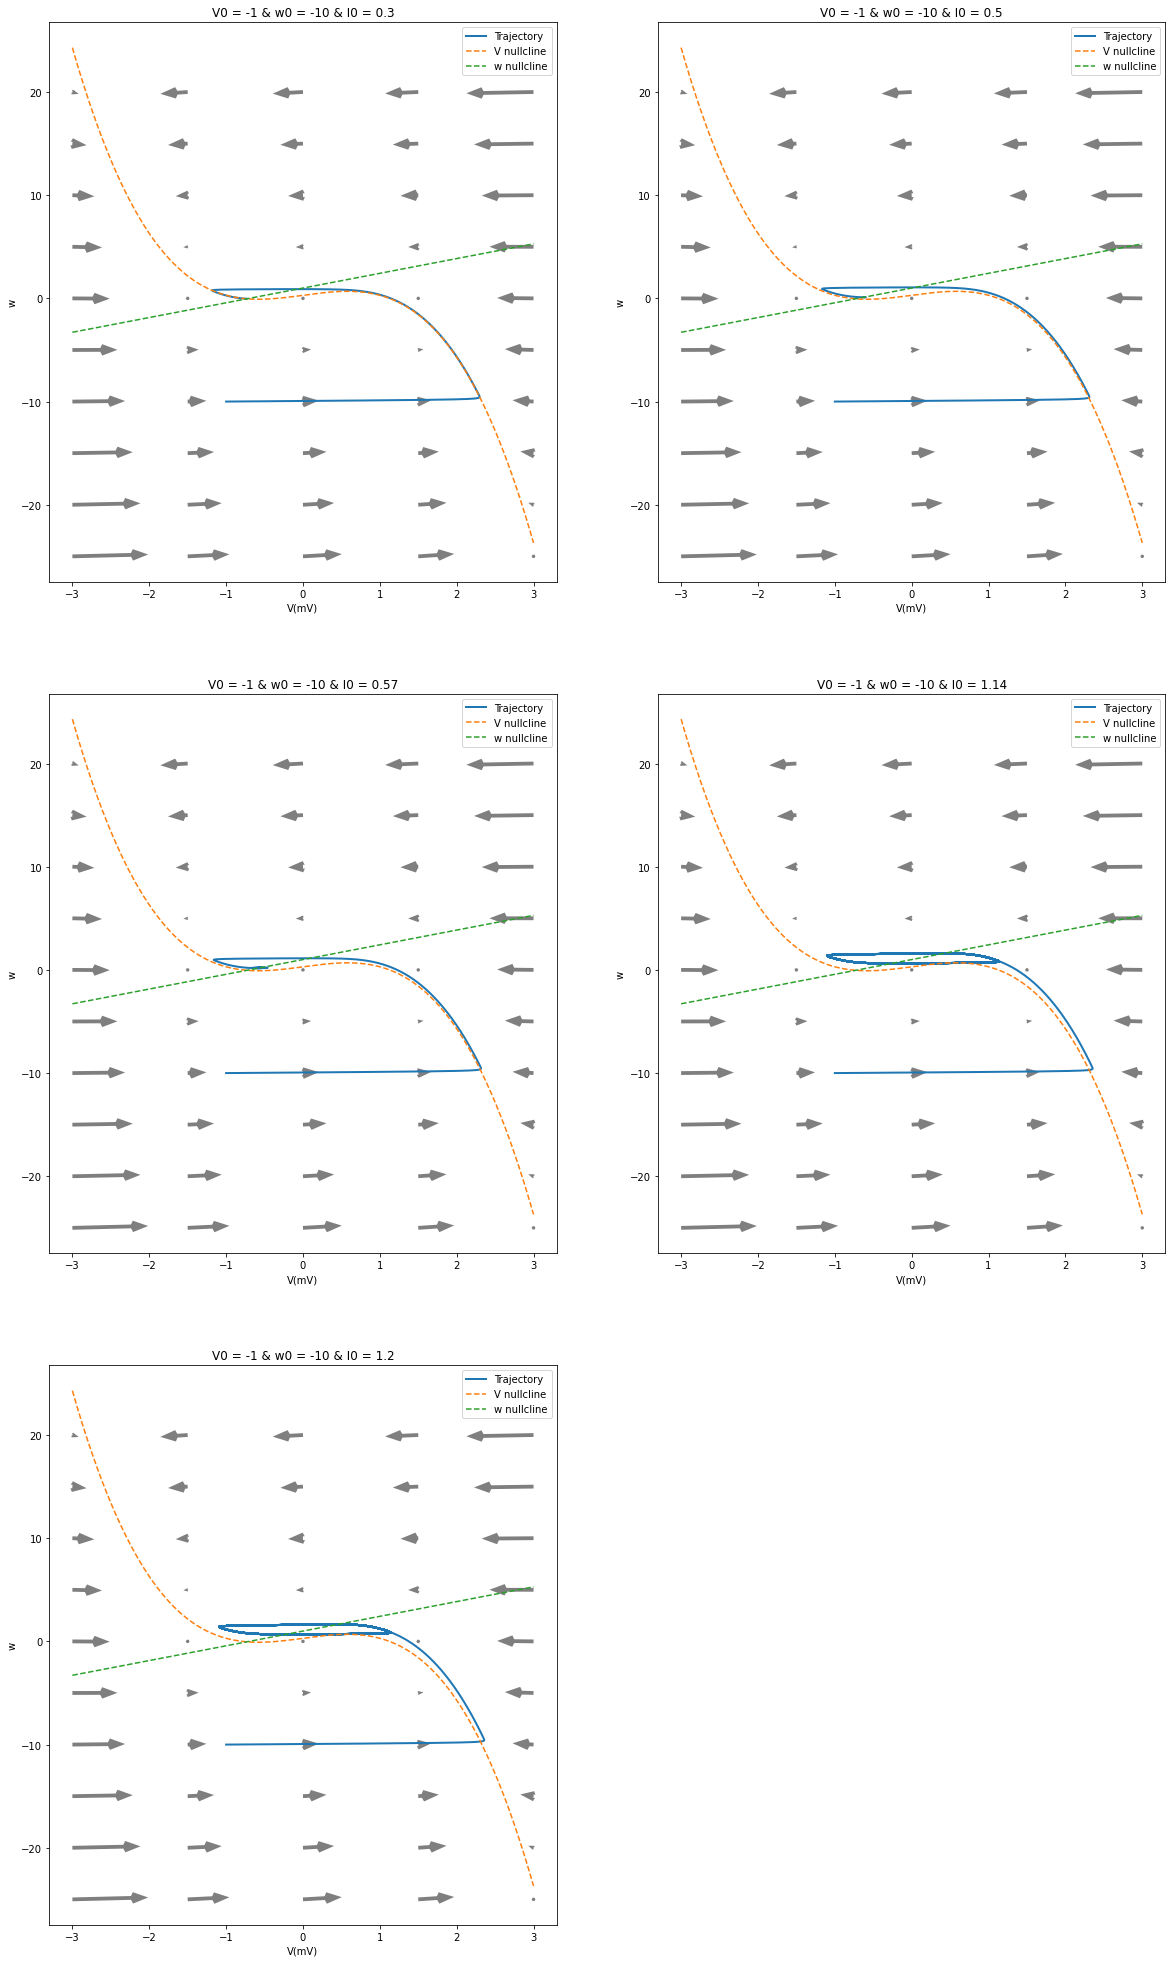

In [29]:
#QUESTION1 Part 4

I0_arr = np.array([0.3 , 0.5, 0.57, 1.14, 1.2])
V0 = -1
w0 = -10
T0 = 1000 #Total simulation time [ms]
T  = math.ceil(T0/dt)  # Total time steps [ms]
t = np.arange(0,T)*dt #time vector
y0 = np.array([V0,w0])
fig, ax = plt.subplots(figsize =(20, 35))
for i in range(len(I0_arr)):
    I0 = I0_arr[i]
   

    y = odeint(FN, y0, t, args=(I0,a,b,c,d))
    V = y[:,0]
    w = y[:,1]

    plt.subplot(3,2,i+1)
    plt.plot(V,w,linewidth=2)
    plt.plot(V_arr,V_null, linestyle = 'dashed')
    plt.plot(V_arr,w_null, linestyle = 'dashed')


    plt.title("V0 = "+str(V0)+" & w0 = "+str(w0)+" & I0 = "+str(I0))
    plt.xlabel('V(mV)')              # Label the axes
    plt.ylabel('w')
    plt.legend(['Trajectory','V nullcline','w nullcline'])




    plt.quiver(X, Y, u1, u2,scale_units='xy', scale=50,headlength = 4, alpha = 0.5)


plt.show()

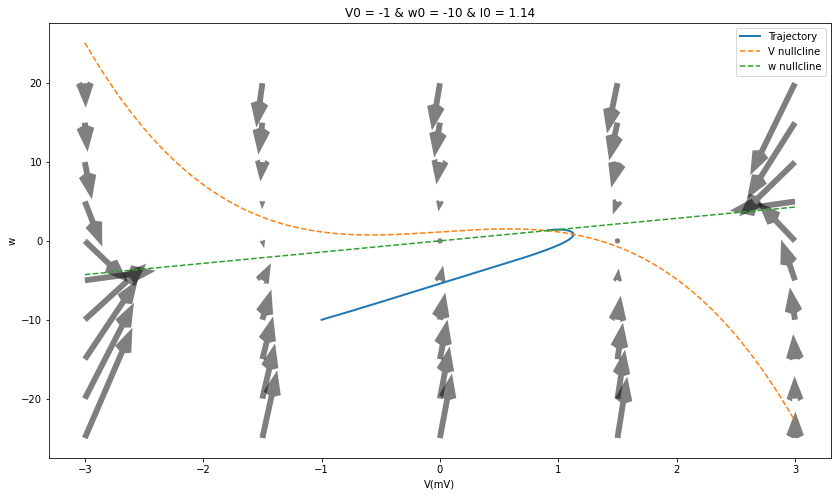

In [30]:
#QUESTION1 Part 6


a_param = 8 #a parameter in w differential equation (for part 6)
b = a_param
c = a_param*0.7
d = 0.056
I0 = 1.14

V_null = V_nullcline(V_arr,I0,a)
w_null = w_nullcline(V_arr,b,c,d)

fig, ax = plt.subplots(figsize =(14, 8))
x = np.linspace(-3, 3, 5) #V-axis
y = np.arange(-25, 25, 5) #w-axis
X, Y = np.meshgrid(x, y)

u1 = -X**3 + (a+1)* X**2 - a*X - Y + I0 #horizontal direction for plot arrows
u2 = -c*Y + b*X + d #vertical direction for plot arrows

V0 = -1
w0 = -10


y0 = np.array([V0,w0])



y = odeint(FN, y0, t, args=(I0,a,b,c,d))
V = y[:,0]
w = y[:,1]


plt.plot(V,w,linewidth=2)
plt.plot(V_arr,V_null, linestyle = 'dashed')
plt.plot(V_arr,w_null, linestyle = 'dashed')


plt.title("V0 = "+str(V0)+" & w0 = "+str(w0)+" & I0 = "+str(I0))
plt.xlabel('V(mV)')              # Label the axes
plt.ylabel('w')
plt.legend(['Trajectory','V nullcline','w nullcline'])




plt.quiver(X, Y, u1, u2,scale_units='xy', scale=50,headlength = 4, alpha = 0.5)


plt.show()    

In [2]:
from math import *

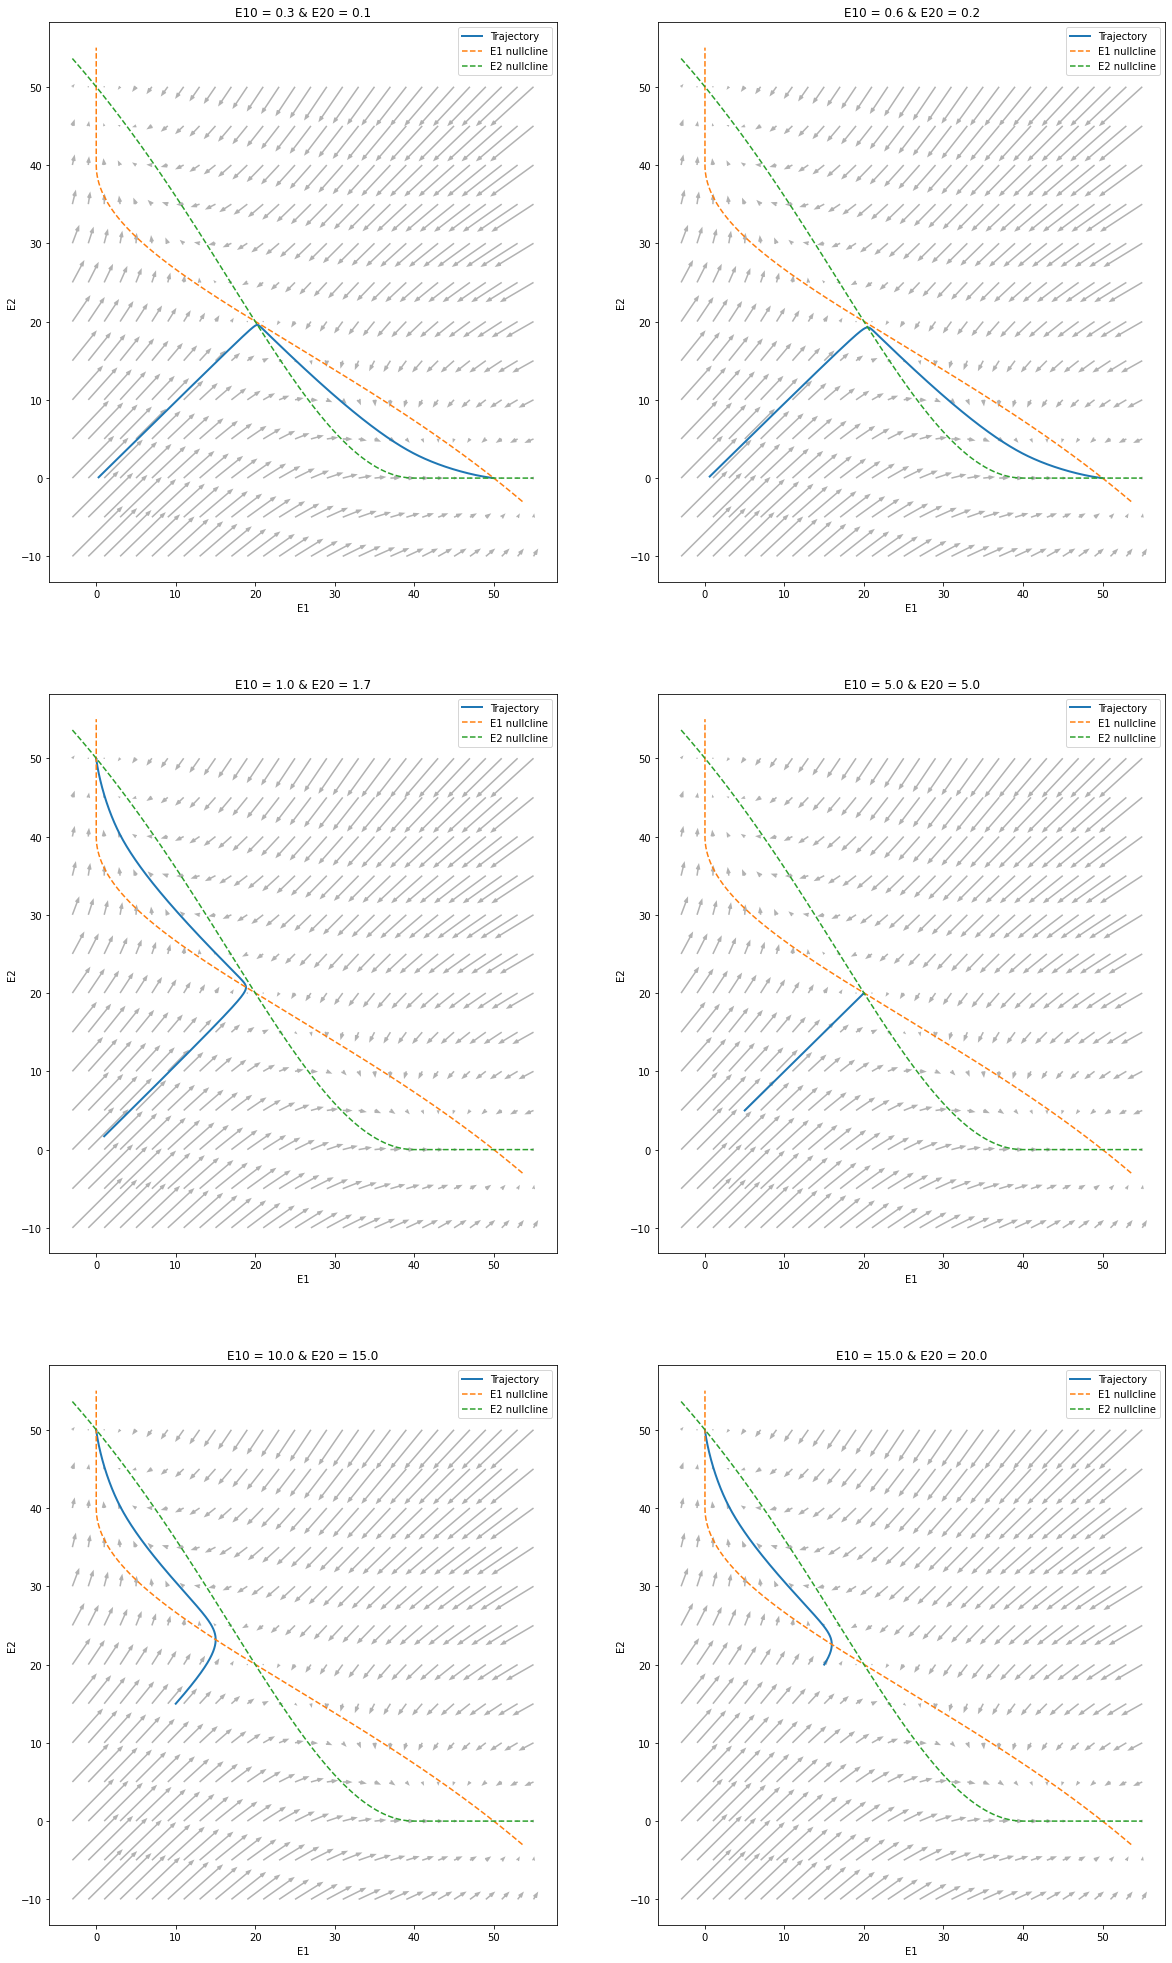

In [3]:
#QUESTION 2, Part 1

def S_fun(x,M,sig,N,isScalar,isVect):
    if isScalar:
        if x>=0:
            s = M * (x**N) / (sig**N + x**N)
        else:
            s = 0
    elif isVect:
        s = np.zeros(len(x))
        for i in range(len(x)): #each row
            if x[i]>=0:
                s[i] = M * (x[i]**N) / (sig**N + x[i]**N)
            else:
                s[i]=0
    else:
        s = np.zeros([len(x),len(x[0])])
        for i in range(len(x)): #each row
            for j in range(len(x[0])): #each column
                if x[i,j]>=0:
                    s[i,j] = M * (x[i,j]**N) / (sig**N + x[i,j]**N)
                else:
                    s[i,j]=0
    return s

def WTA(y,t,tau,k1,k2,M,sig,N):  #winner takes all function     

    E1, E2 = y
    
    
    dydt =  [1/tau *(-E1 + S_fun(k1-3*E2,M,sig,N,true,false)) , 1/tau *(-E2 + S_fun(k2-3*E1,M,sig,N,true,false))]

    return dydt

def E1_nullcline(E2_arr,k1,sig,M,isVect):
#     for i in range(len(E1_arr)):
        #E2 = 1/3 * (k1 - np.sqrt(sig**2 * np.divide(E1_arr , (M - E1_arr))))
    
    E1 = S_fun(k1-3*E2_arr,M,sig,N,false,isVect)
    return E1

def E2_nullcline(E1_arr,k2,sig,M,isVect): #assuming N=2
    E2 = S_fun(k2-3*E1_arr,M,sig,N,false,isVect)
    return E2



tau = 20
M = 100
N = 2
sig = 120
k1 = 120
k2 = 120

T0 = 1000 #Total simulation time [ms]
dt = 0.01; #time resolution [ms]
T  = math.ceil(T0/dt)  # Total time steps [ms]
t = np.arange(0,T)*dt #time vector

E1_arr = np.linspace(-3,55,1000)
E2_arr = np.linspace(-3,55,1000)

fig, ax = plt.subplots(figsize =(20, 35))
x = np.linspace(-3, 55, 30) #V-axis
y = np.arange(-10, 55, 5) #w-axis
X, Y = np.meshgrid(x, y)


u1 = 1/tau * (-X + S_fun(k1 - 3*Y, M, sig, N, false, false)) #horizontal direction for plot arrows

u2 = 1/tau * (-Y + S_fun(k2 - 3*X, M, sig, N, false, false)) #vertical direction for plot arrows

E1Null_E1Arr = E1_nullcline(E2_arr,k1,sig,M,true) 
E2Null_E2Arr = E2_nullcline(E1_arr,k2,sig,M,true)

E10_arr = np.array([0.3,0.6,1,5,10,15])
E20_arr = np.array([0.1,0.2,1.7,5,15,20])



for i in range(len(E10_arr)):
    E10 = E10_arr[i]
    E20 = E20_arr[i]
    
    y0 = np.array([E10,E20])


    y = odeint(WTA, y0, t, args=(tau,k1,k2,M,sig,N))
    E1 = y[:,0]
    E2 = y[:,1]
    plt.subplot(3,2,i+1)
    plt.plot(E1,E2,linewidth=2)
    plt.plot(E1Null_E1Arr,E2_arr, linestyle = 'dashed')
    plt.plot(E1_arr,E2Null_E2Arr, linestyle = 'dashed')


    plt.title("E10 = "+str(E10)+" & E20 = "+str(E20))
    plt.xlabel('E1')              # Label the axes
    plt.ylabel('E2')
    plt.legend(['Trajectory','E1 nullcline','E2 nullcline'])

    plt.quiver(X, Y, u1, u2,scale_units='xy', scale=0.5,headlength = 4, alpha = 0.3)


plt.show()

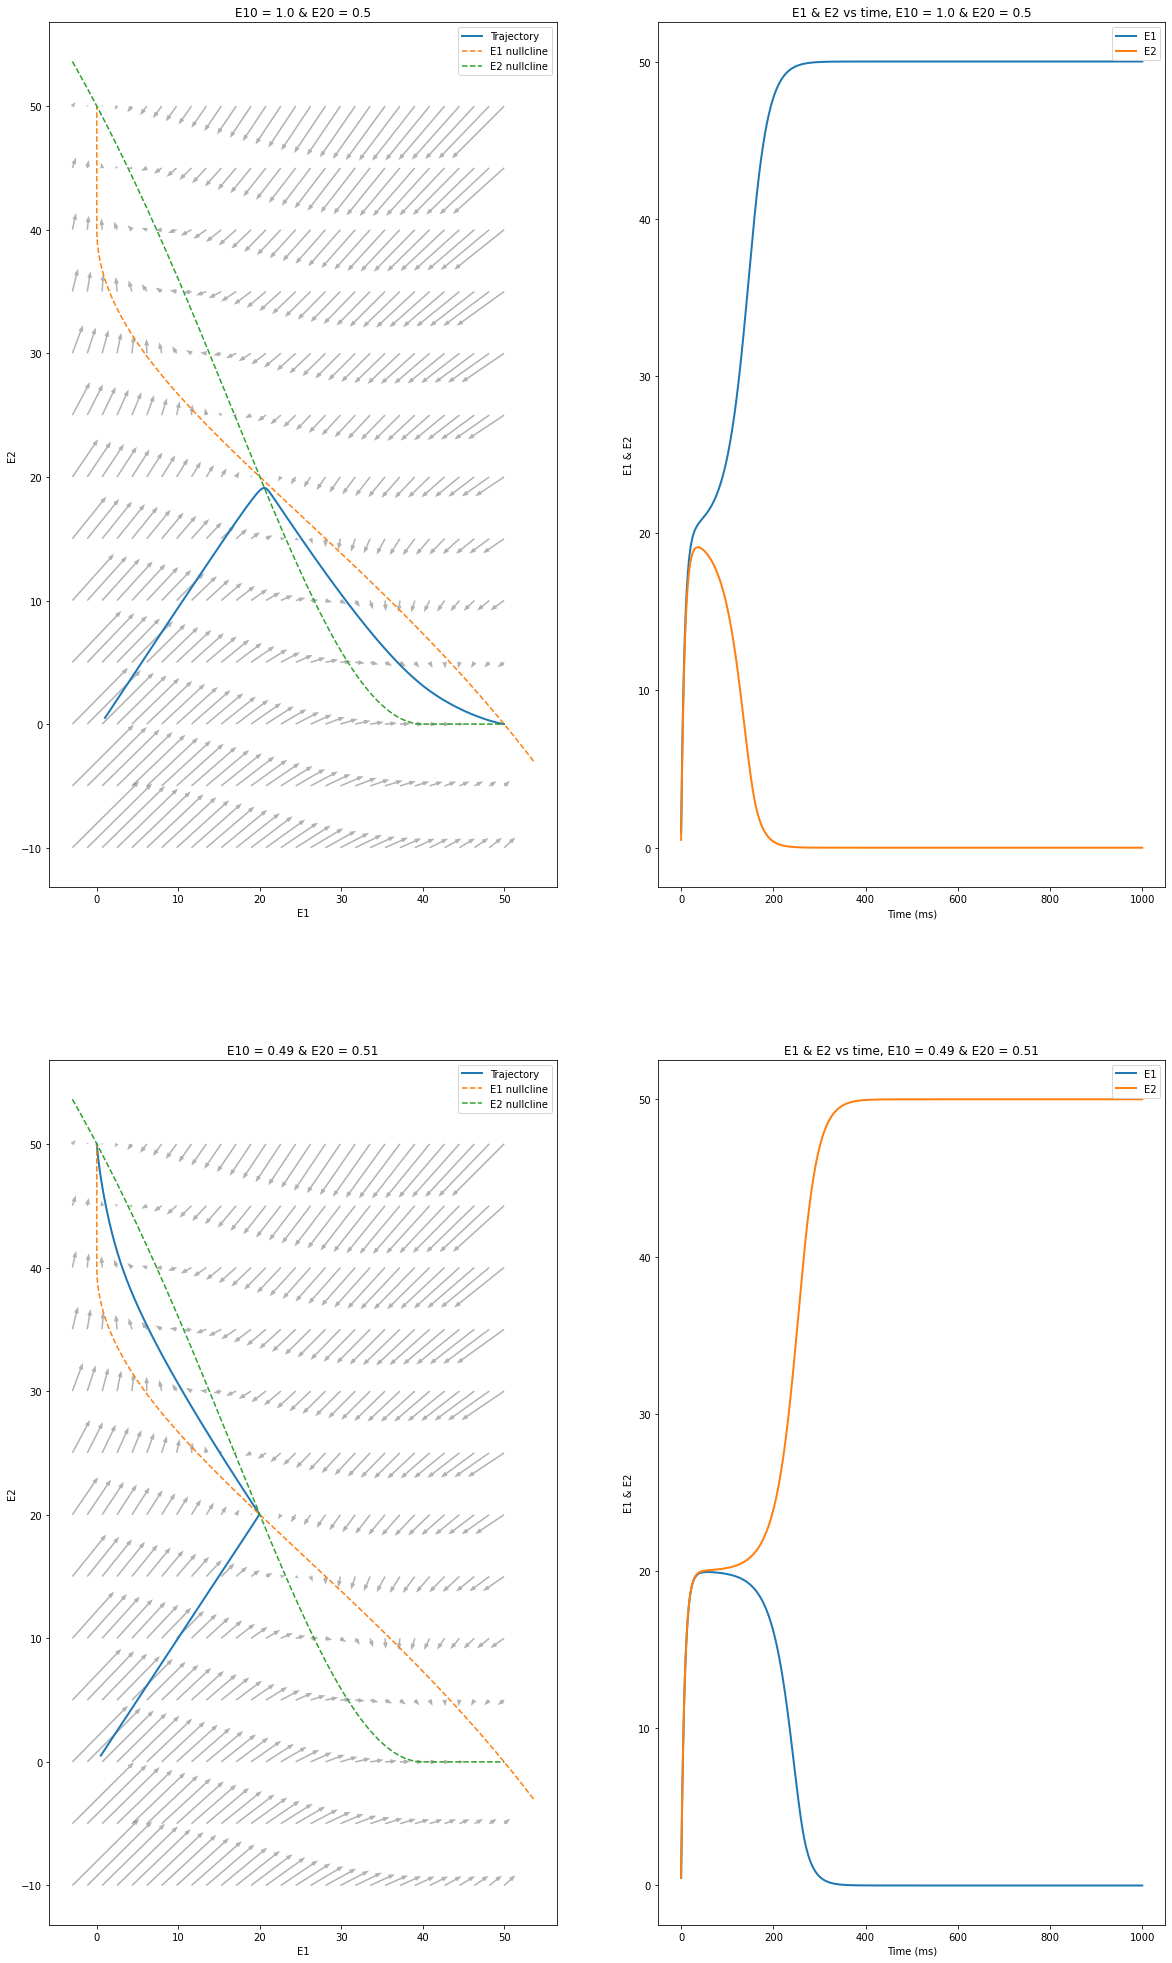

In [38]:
#QUESTION 2, Part 2

E10_arr = np.array([1, 0.49])
E20_arr = np.array([0.50, 0.51])

fig, ax = plt.subplots(figsize =(20, 35))

for i in range(len(E10_arr)):
    E10 = E10_arr[i]
    E20 = E20_arr[i]
    
    y0 = np.array([E10,E20])


    y = odeint(WTA, y0, t, args=(tau,k1,k2,M,sig,N))
    E1 = y[:,0]
    E2 = y[:,1]
    
    plt.subplot(2,2,2*i+1)
    plt.plot(E1,E2,linewidth=2)
    plt.plot(E1Null_E1Arr,E2_arr, linestyle = 'dashed')
    plt.plot(E1_arr,E2Null_E2Arr, linestyle = 'dashed')
    plt.title("E10 = "+str(E10)+" & E20 = "+str(E20))
    plt.xlabel('E1')              # Label the axes
    plt.ylabel('E2')
    plt.quiver(X, Y, u1, u2,scale_units='xy', scale = 0.5,headlength = 4, alpha = 0.3)
    plt.legend(['Trajectory','E1 nullcline','E2 nullcline'])
    
    plt.subplot(2,2,2*i+2)
    plt.plot(t,E1,linewidth=2)
    plt.plot(t,E2,linewidth=2)
    plt.title("E1 & E2 vs time, E10 = "+str(E10)+" & E20 = "+str(E20))
    plt.xlabel('Time (ms)')              # Label the axes
    plt.ylabel('E1 & E2')
    plt.legend(['E1','E2'])

plt.show()

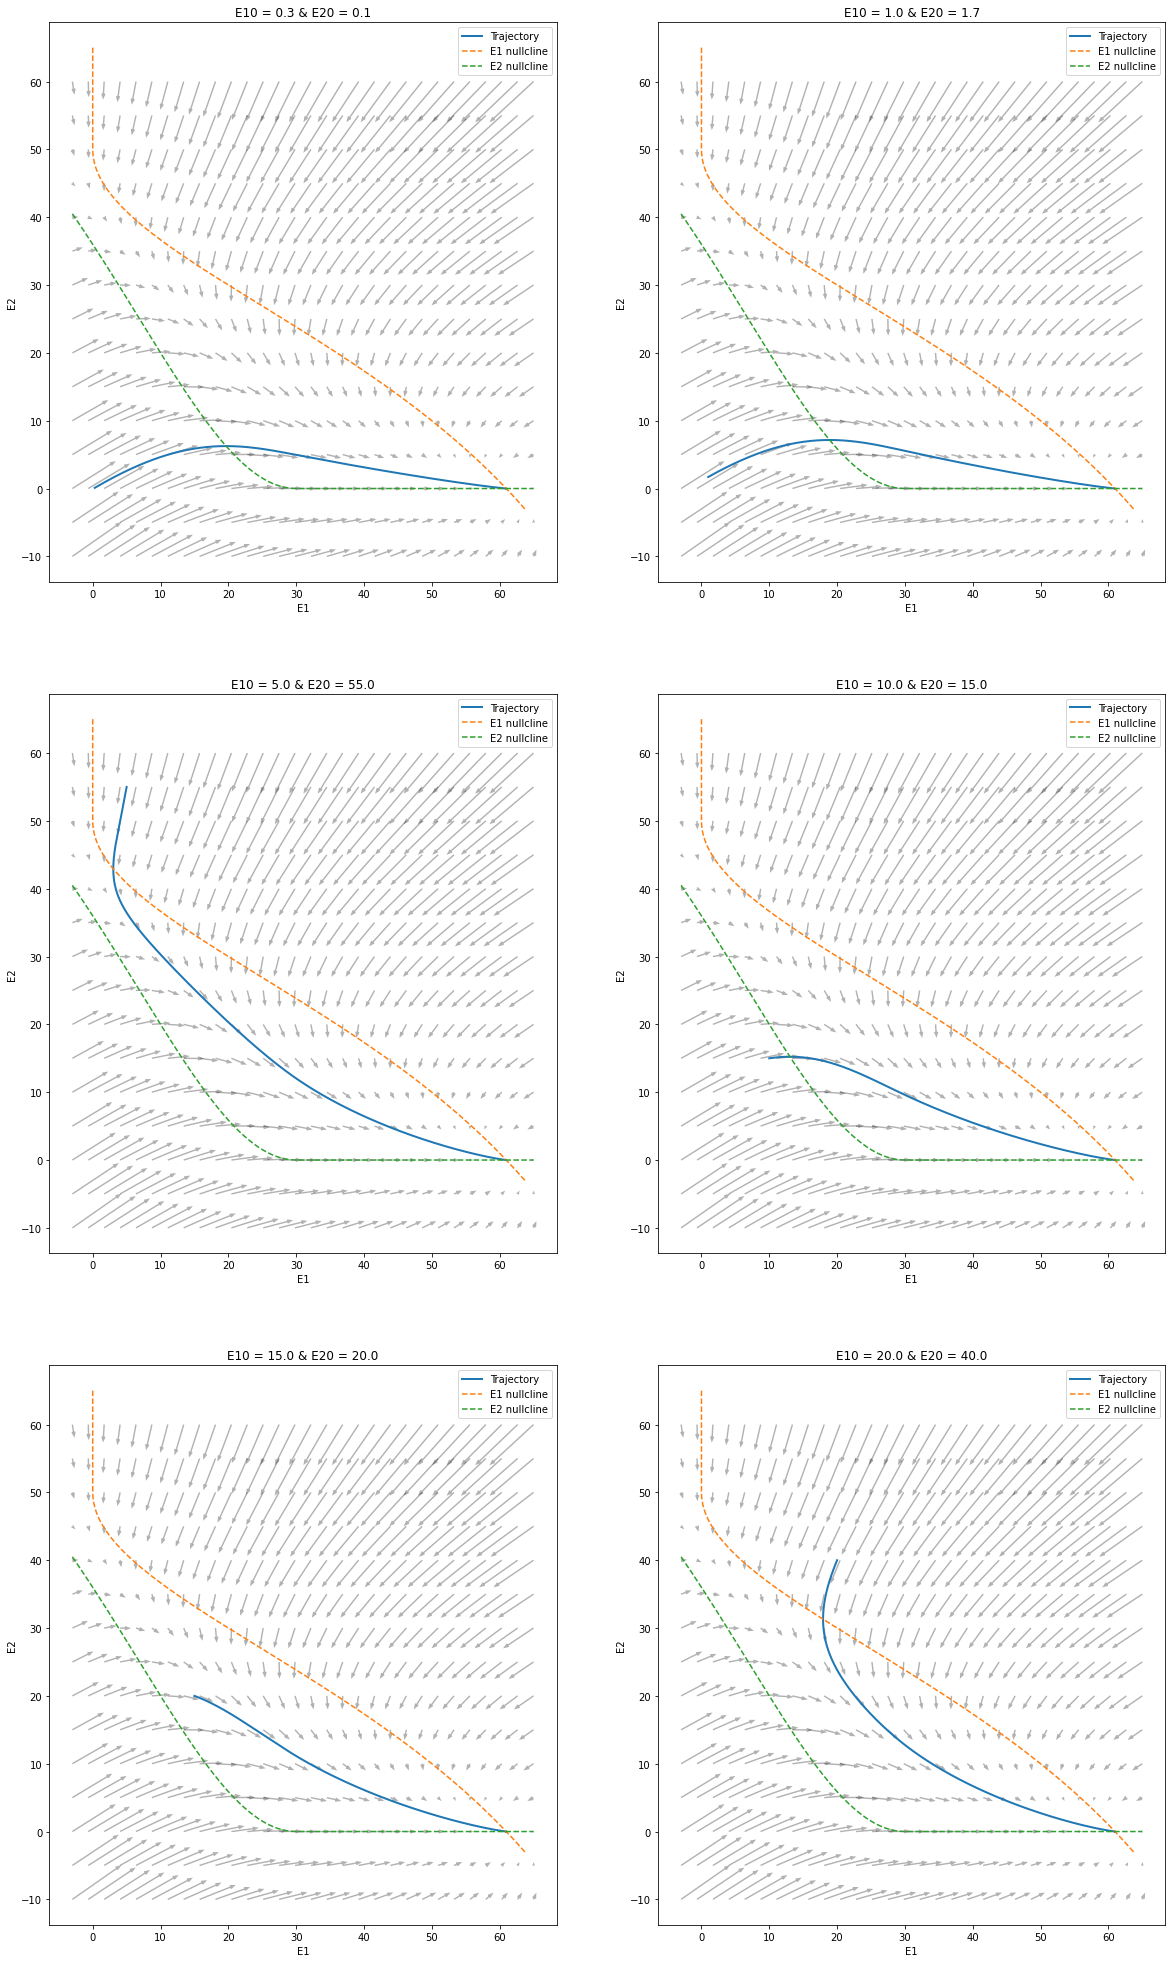

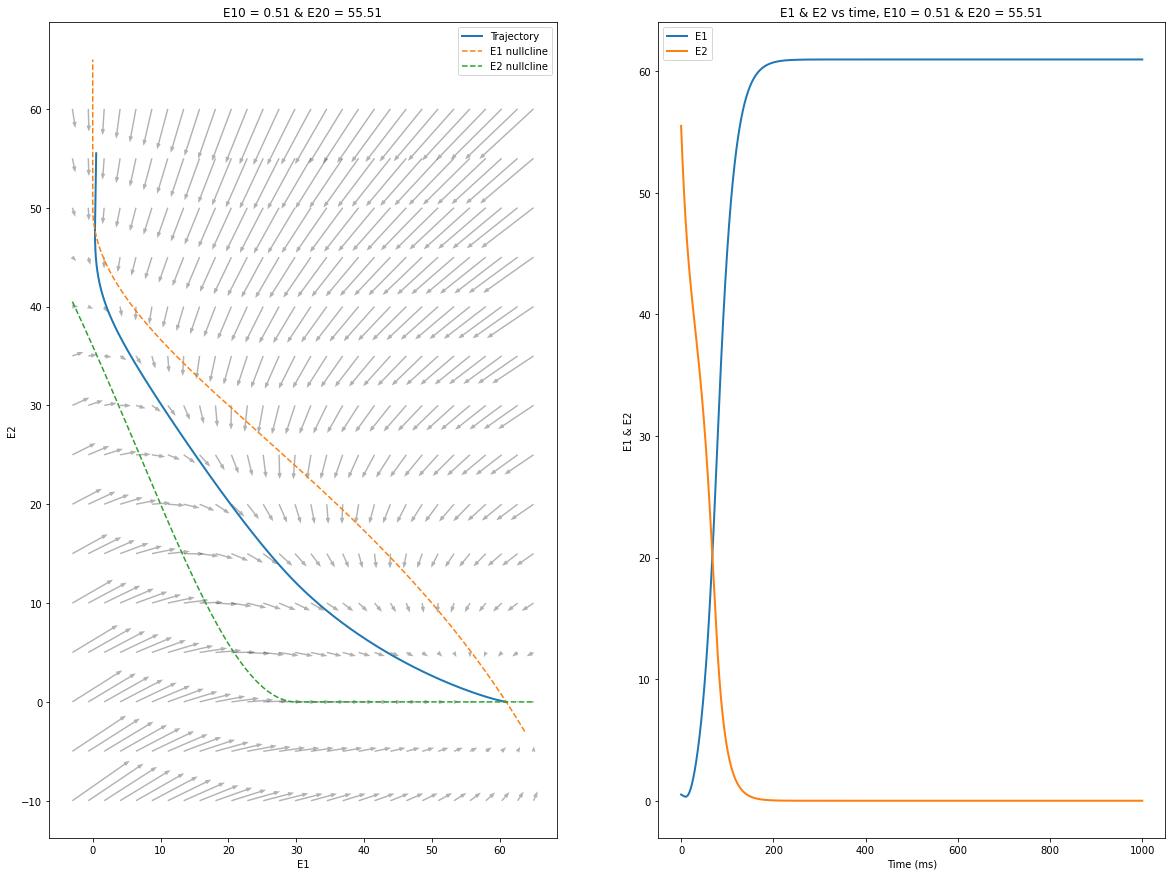

In [52]:
#Question 2, Part 4
tau = 20
M = 100
N = 2
sig = 120
k1 = 150
k2 = 90

T0 = 1000 #Total simulation time [ms]
dt = 0.01; #time resolution [ms]
T  = math.ceil(T0/dt)  # Total time steps [ms]
t = np.arange(0,T)*dt #time vector

E1_arr = np.linspace(-3,65,1000)
E2_arr = np.linspace(-3,65,1000)

fig, ax = plt.subplots(figsize =(20, 35))
x = np.linspace(-3, 65, 30) #V-axis
y = np.arange(-10, 65, 5) #w-axis
X, Y = np.meshgrid(x, y)


u1 = 1/tau * (-X + S_fun(k1 - 3*Y, M, sig, N, false, false)) #horizontal direction for plot arrows

u2 = 1/tau * (-Y + S_fun(k2 - 3*X, M, sig, N, false, false)) #vertical direction for plot arrows

E1Null_E1Arr = E1_nullcline(E2_arr,k1,sig,M,true) 
E2Null_E2Arr = E2_nullcline(E1_arr,k2,sig,M,true)

E10_arr = np.array([0.3,1,5,10,15,20])
E20_arr = np.array([0.1,1.7,55,15,20,40])



for i in range(len(E10_arr)):
    E10 = E10_arr[i]
    E20 = E20_arr[i]
    
    y0 = np.array([E10,E20])


    y = odeint(WTA, y0, t, args=(tau,k1,k2,M,sig,N))
    E1 = y[:,0]
    E2 = y[:,1]
    plt.subplot(3,2,i+1)
    plt.plot(E1,E2,linewidth=2)
    plt.plot(E1Null_E1Arr,E2_arr, linestyle = 'dashed')
    plt.plot(E1_arr,E2Null_E2Arr, linestyle = 'dashed')


    plt.title("E10 = "+str(E10)+" & E20 = "+str(E20))
    plt.xlabel('E1')              # Label the axes
    plt.ylabel('E2')
    plt.legend(['Trajectory','E1 nullcline','E2 nullcline'])

    plt.quiver(X, Y, u1, u2,scale_units='xy', scale=0.5,headlength = 4, alpha = 0.3)


plt.show()




#time plots

E10_arr = np.array([0.51])
E20_arr = np.array([55.51])

fig, ax = plt.subplots(figsize =(20, 15))

for i in range(len(E10_arr)):
    E10 = E10_arr[i]
    E20 = E20_arr[i]
    
    y0 = np.array([E10,E20])


    y = odeint(WTA, y0, t, args=(tau,k1,k2,M,sig,N))
    E1 = y[:,0]
    E2 = y[:,1]
    
    plt.subplot(1,2,2*i+1)
    plt.plot(E1,E2,linewidth=2)
    plt.plot(E1Null_E1Arr,E2_arr, linestyle = 'dashed')
    plt.plot(E1_arr,E2Null_E2Arr, linestyle = 'dashed')
    plt.title("E10 = "+str(E10)+" & E20 = "+str(E20))
    plt.xlabel('E1')              # Label the axes
    plt.ylabel('E2')
    plt.quiver(X, Y, u1, u2,scale_units='xy', scale = 0.5,headlength = 4, alpha = 0.3)
    plt.legend(['Trajectory','E1 nullcline','E2 nullcline'])
    
    plt.subplot(1,2,2*i+2)
    plt.plot(t,E1,linewidth=2)
    plt.plot(t,E2,linewidth=2)
    plt.title("E1 & E2 vs time, E10 = "+str(E10)+" & E20 = "+str(E20))
    plt.xlabel('Time (ms)')              # Label the axes
    plt.ylabel('E1 & E2')
    plt.legend(['E1','E2'])

plt.show()

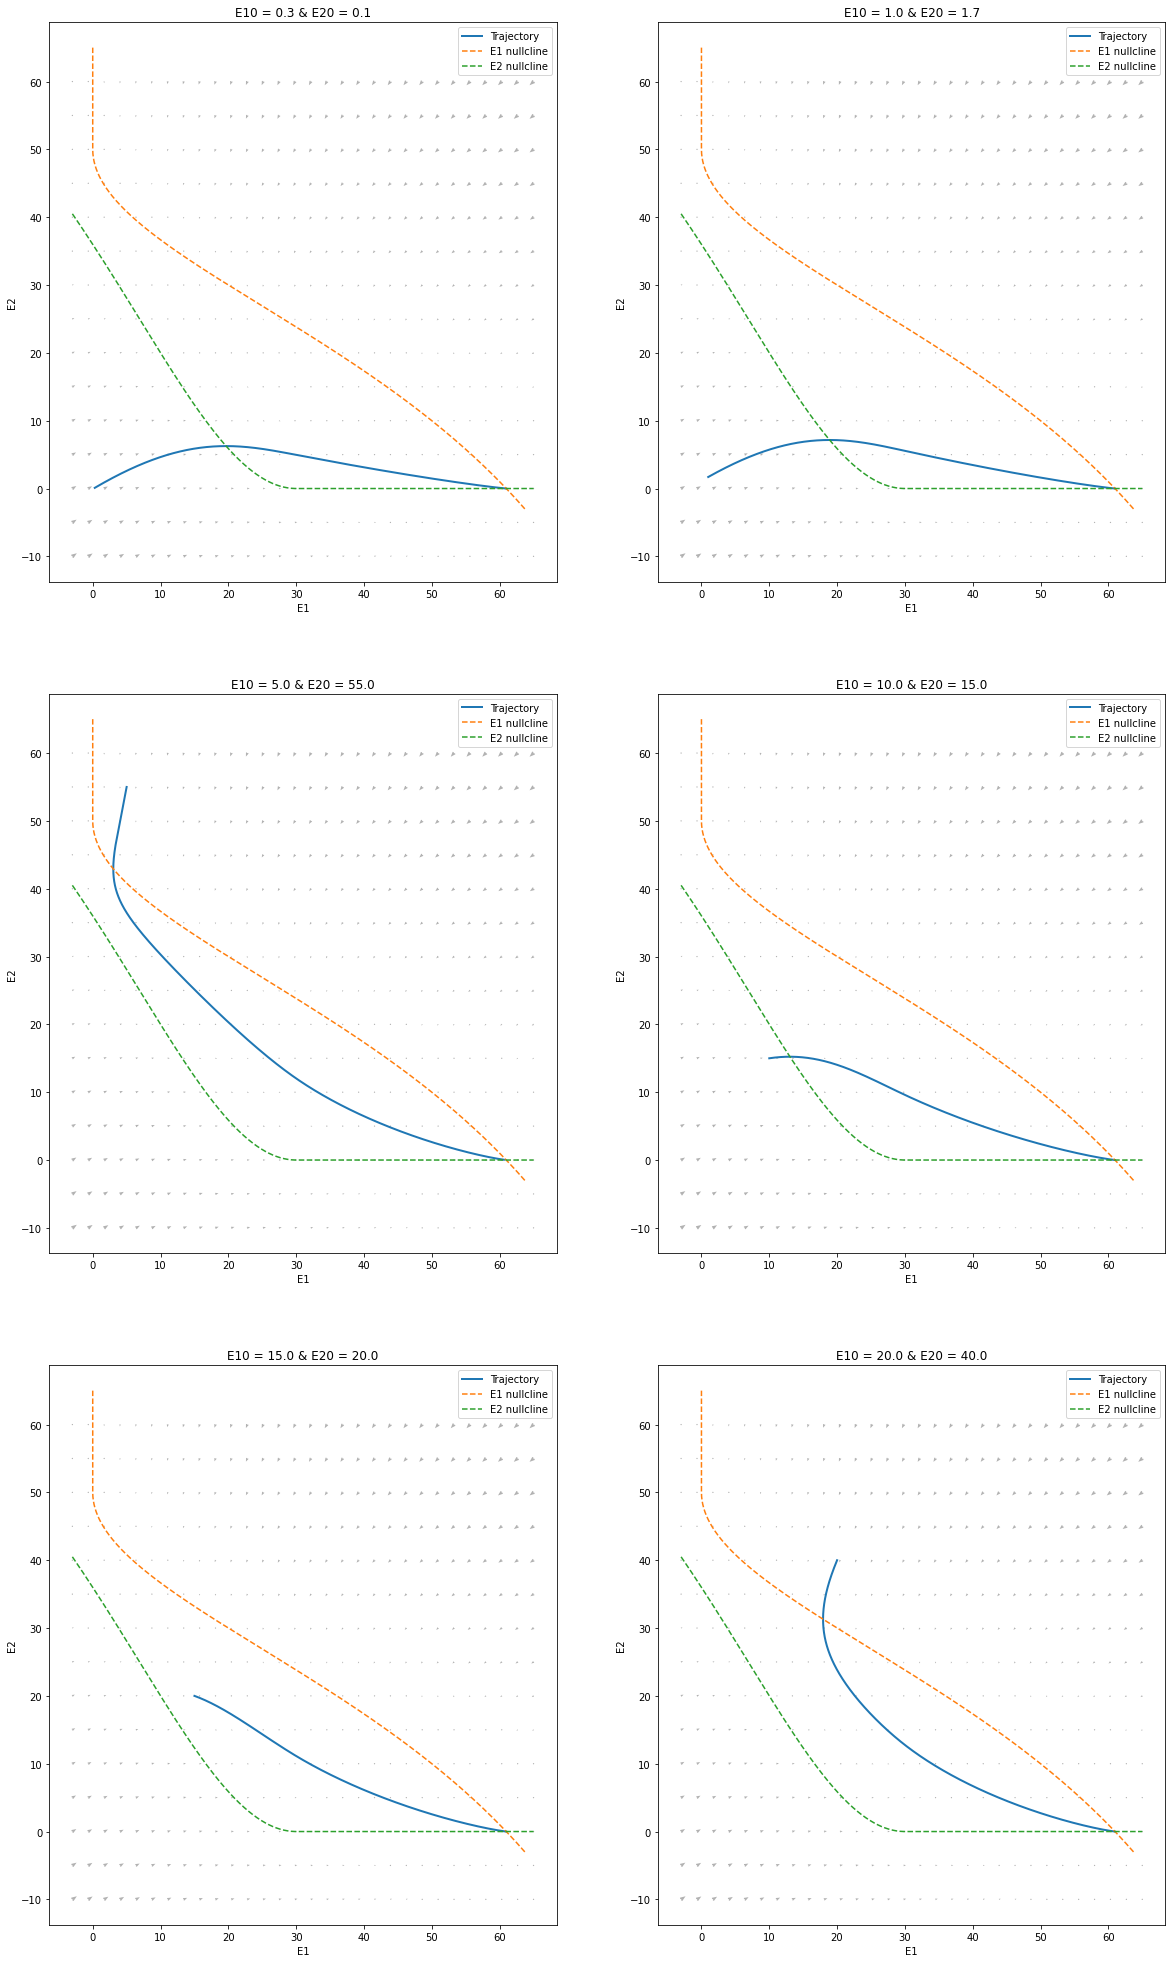

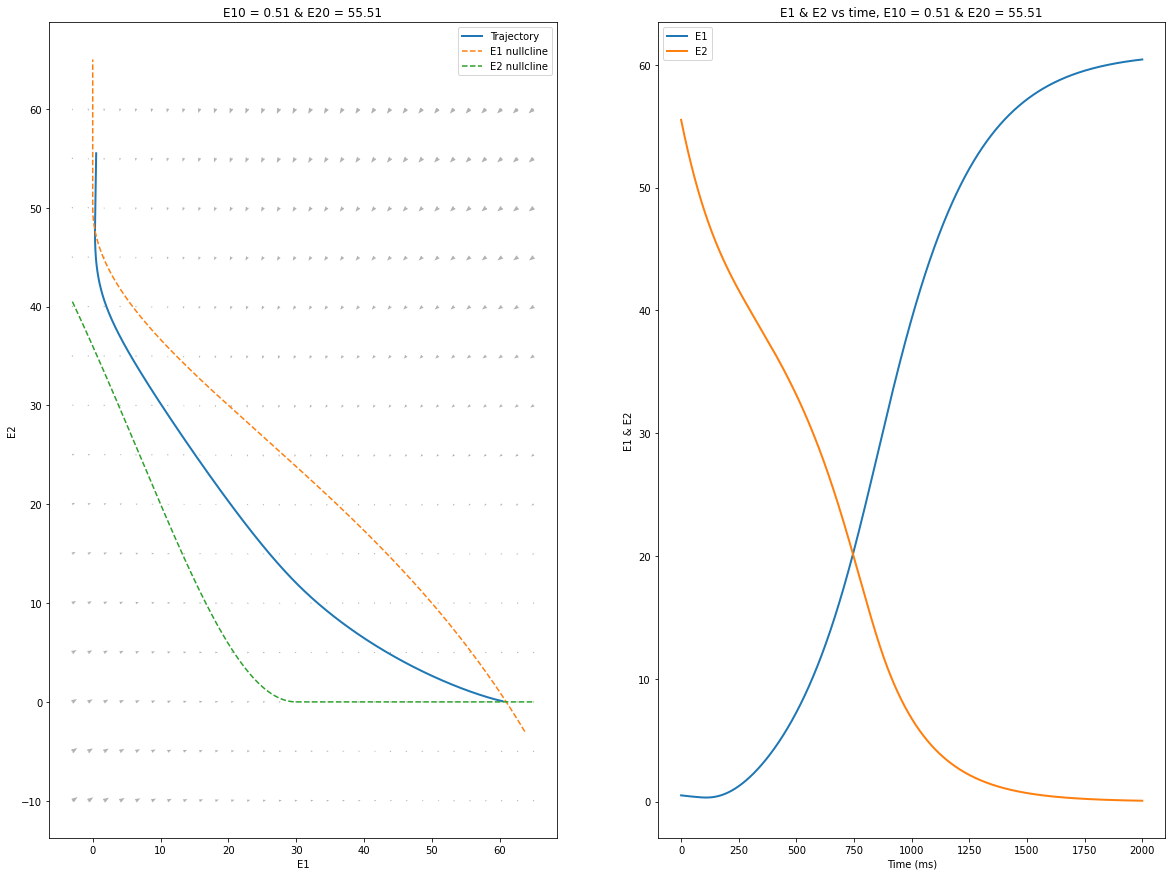

In [57]:
#Question 2, Part 5
tau = 220
M = 100
N = 2
sig = 120
k1 = 150
k2 = 90

T0 = 2000 #Total simulation time [ms]
dt = 0.01; #time resolution [ms]
T  = math.ceil(T0/dt)  # Total time steps [ms]
t = np.arange(0,T)*dt #time vector

E1_arr = np.linspace(-3,65,1000)
E2_arr = np.linspace(-3,65,1000)

fig, ax = plt.subplots(figsize =(20, 35))
x = np.linspace(-3, 65, 30) #V-axis
y = np.arange(-10, 65, 5) #w-axis
X, Y = np.meshgrid(x, y)


u1 = 1/tau * (-X + S_fun(k1 - 3*Y, M, sig, N, false, false)) #horizontal direction for plot arrows

u2 = 1/tau * (-Y + S_fun(k2 - 3*X, M, sig, N, false, false)) #vertical direction for plot arrows

E1Null_E1Arr = E1_nullcline(E2_arr,k1,sig,M,true) 
E2Null_E2Arr = E2_nullcline(E1_arr,k2,sig,M,true)

E10_arr = np.array([0.3,1,5,10,15,20])
E20_arr = np.array([0.1,1.7,55,15,20,40])



for i in range(len(E10_arr)):
    E10 = E10_arr[i]
    E20 = E20_arr[i]
    
    y0 = np.array([E10,E20])


    y = odeint(WTA, y0, t, args=(tau,k1,k2,M,sig,N))
    E1 = y[:,0]
    E2 = y[:,1]
    plt.subplot(3,2,i+1)
    plt.plot(E1,E2,linewidth=2)
    plt.plot(E1Null_E1Arr,E2_arr, linestyle = 'dashed')
    plt.plot(E1_arr,E2Null_E2Arr, linestyle = 'dashed')


    plt.title("E10 = "+str(E10)+" & E20 = "+str(E20))
    plt.xlabel('E1')              # Label the axes
    plt.ylabel('E2')
    plt.legend(['Trajectory','E1 nullcline','E2 nullcline'])

    plt.quiver(X, Y, u1, u2,scale_units='xy', scale=0.5,headlength = 4, alpha = 0.3)


plt.show()




#time plots

E10_arr = np.array([0.51])
E20_arr = np.array([55.51])

fig, ax = plt.subplots(figsize =(20, 15))

for i in range(len(E10_arr)):
    E10 = E10_arr[i]
    E20 = E20_arr[i]
    
    y0 = np.array([E10,E20])


    y = odeint(WTA, y0, t, args=(tau,k1,k2,M,sig,N))
    E1 = y[:,0]
    E2 = y[:,1]
    
    plt.subplot(1,2,2*i+1)
    plt.plot(E1,E2,linewidth=2)
    plt.plot(E1Null_E1Arr,E2_arr, linestyle = 'dashed')
    plt.plot(E1_arr,E2Null_E2Arr, linestyle = 'dashed')
    plt.title("E10 = "+str(E10)+" & E20 = "+str(E20))
    plt.xlabel('E1')              # Label the axes
    plt.ylabel('E2')
    plt.quiver(X, Y, u1, u2,scale_units='xy', scale = 0.5,headlength = 4, alpha = 0.3)
    plt.legend(['Trajectory','E1 nullcline','E2 nullcline'])
    
    plt.subplot(1,2,2*i+2)
    plt.plot(t,E1,linewidth=2)
    plt.plot(t,E2,linewidth=2)
    plt.title("E1 & E2 vs time, E10 = "+str(E10)+" & E20 = "+str(E20))
    plt.xlabel('Time (ms)')              # Label the axes
    plt.ylabel('E1 & E2')
    plt.legend(['E1','E2'])

plt.show()